<a href="https://colab.research.google.com/github/BirasaDivine/Maternal_Health_Risk_Mobile-App-Regression/blob/main/MobileApp_Regression_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [119]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, mean_absolute_error
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import pickle
from warnings import filterwarnings
filterwarnings('ignore')

In [120]:
data=pd.read_csv('Maternal Health Risk Data Set.csv')

In [121]:
print(data.columns)

Index(['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate',
       'RiskLevel'],
      dtype='object')


In [122]:
data.head(10)

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.00,98.0,86,high risk
1,35,140,90,13.00,98.0,70,high risk
2,29,90,70,8.00,100.0,80,high risk
3,30,140,85,7.00,98.0,70,high risk
4,35,120,60,6.10,98.0,76,low risk
5,23,140,80,7.01,98.0,70,high risk
6,23,130,70,7.01,98.0,78,mid risk
7,35,85,60,11.00,102.0,86,high risk
8,32,120,90,6.90,98.0,70,mid risk
9,42,130,80,18.00,98.0,70,high risk


In [123]:
print(data.shape)

(1014, 7)


In [124]:
print("\nMATERNAL RISK ANALYSIS\n")

low_cols = []

for col in data.columns:
    unique_count = data[col].nunique(dropna=True)

    if unique_count <= 10:
        low_cols.append(col)

        print(f"{col}: unique={unique_count}")
        print(data[col].value_counts(dropna=False))
        print("-" * 40)

print("Detected low-maternal-risk columns (<=10 unique values):", low_cols)



MATERNAL RISK ANALYSIS

BodyTemp: unique=8
BodyTemp
98.0     804
101.0     98
102.0     66
100.0     20
103.0     13
99.0      10
98.4       2
98.6       1
Name: count, dtype: int64
----------------------------------------
RiskLevel: unique=3
RiskLevel
low risk     406
mid risk     336
high risk    272
Name: count, dtype: int64
----------------------------------------
Detected low-maternal-risk columns (<=10 unique values): ['BodyTemp', 'RiskLevel']


In [125]:
data.describe()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
count,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000
mean,29.871795,113.198225,76.460552,8.725986,98.665089,74.301775
std,13.474386,18.403913,13.885796,3.293532,1.371384,8.088702
min,10.000000,70.000000,49.000000,6.000000,98.000000,7.000000
25%,19.000000,100.000000,65.000000,6.900000,98.000000,70.000000
50%,26.000000,120.000000,80.000000,7.500000,98.000000,76.000000
75%,39.000000,120.000000,90.000000,8.000000,98.000000,80.000000
max,70.000000,160.000000,100.000000,19.000000,103.000000,90.000000


In [126]:
print(data['RiskLevel'].unique())


['high risk' 'low risk' 'mid risk']


In [127]:
data['RiskLevel'] = data['RiskLevel'].map({'mid risk': 0, 'high risk': 1 , 'low risk' : 2})


In [128]:
data.head(10)

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.00,98.0,86,1
1,35,140,90,13.00,98.0,70,1
2,29,90,70,8.00,100.0,80,1
3,30,140,85,7.00,98.0,70,1
4,35,120,60,6.10,98.0,76,2
5,23,140,80,7.01,98.0,70,1
6,23,130,70,7.01,98.0,78,0
7,35,85,60,11.00,102.0,86,1
8,32,120,90,6.90,98.0,70,0
9,42,130,80,18.00,98.0,70,1


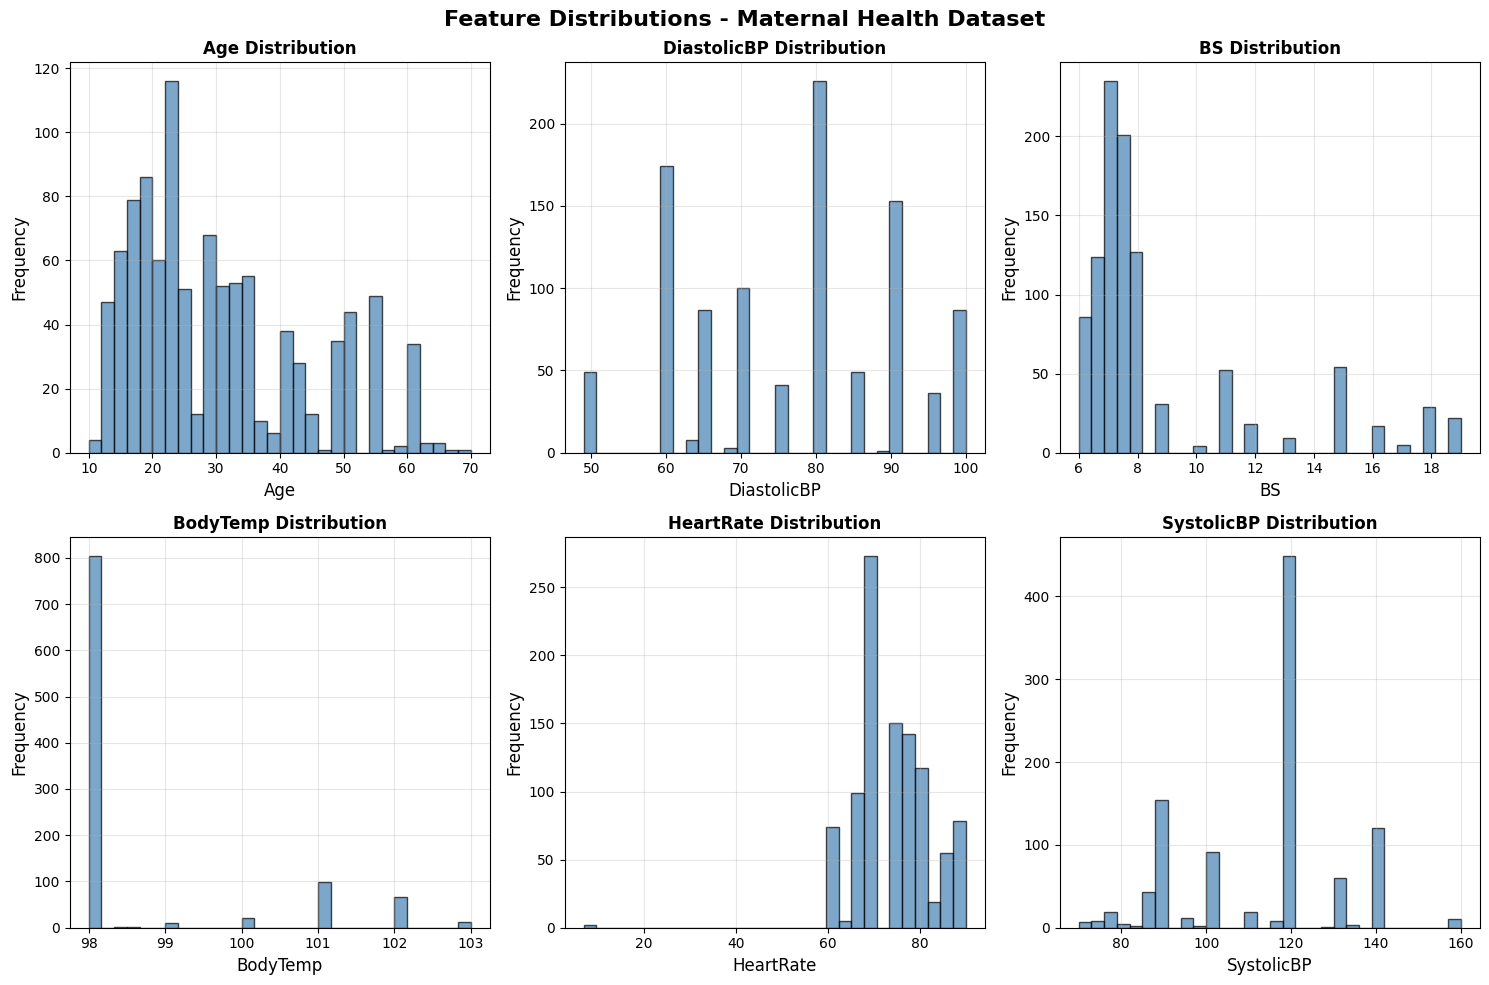

In [156]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Feature Distributions - Maternal Health Dataset',
             fontsize=16, fontweight='bold')

features = ['Age', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate', 'SystolicBP']

for idx, feature in enumerate(features):
    row = idx // 3
    col = idx % 3
    ax = axes[row, col]

    # Histogram with KDE
    ax.hist(data[feature], bins=30, alpha=0.7, color='steelblue', edgecolor='black')
    ax.set_xlabel(feature, fontsize=12)
    ax.set_ylabel('Frequency', fontsize=12)
    ax.set_title(f'{feature} Distribution', fontweight='bold')
    ax.grid(True, alpha=0.3)

plt.tight_layout()
# SAVE the figure
plt.savefig("feature_distributions.png", dpi=300, bbox_inches='tight')
plt.show()

In [130]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   int64  
dtypes: float64(2), int64(5)
memory usage: 55.6 KB


In [131]:
data.duplicated().sum()

np.int64(562)

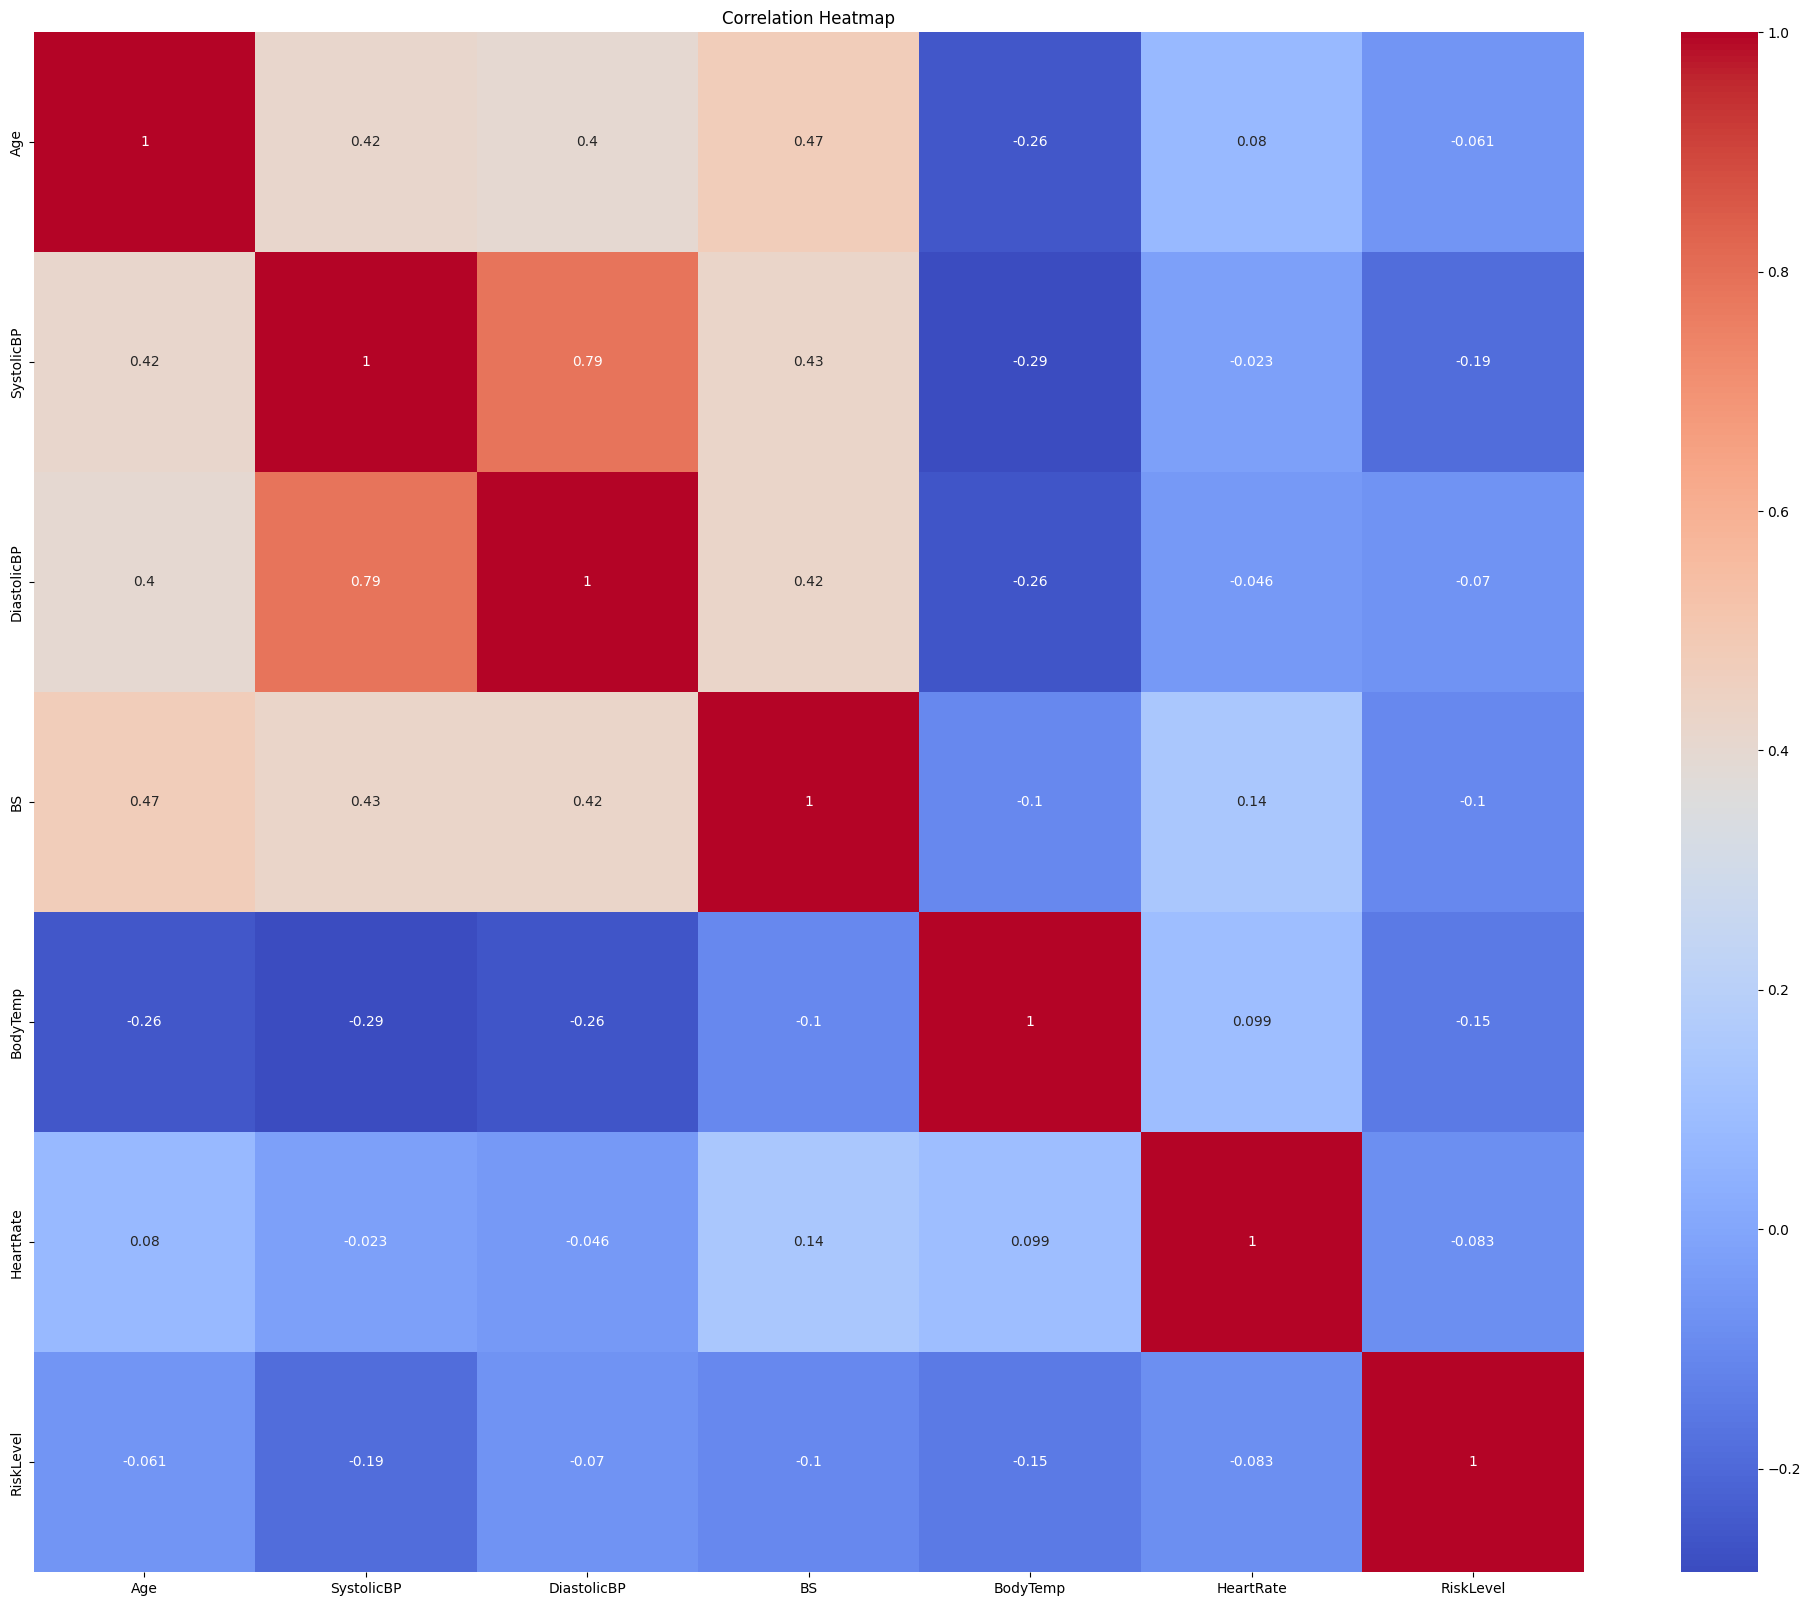

In [132]:
plt.figure(figsize=(25,20))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
# Save the heatmap
plt.savefig("heatmap.png", dpi=300, bbox_inches='tight')
plt.show()


<Axes: xlabel='SystolicBP', ylabel='DiastolicBP'>

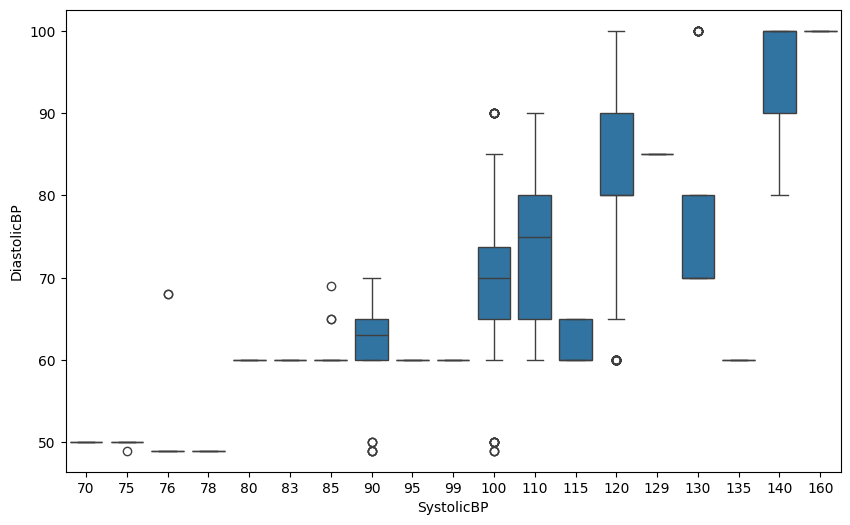

In [133]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['SystolicBP'], y=data['DiastolicBP'], data=data)

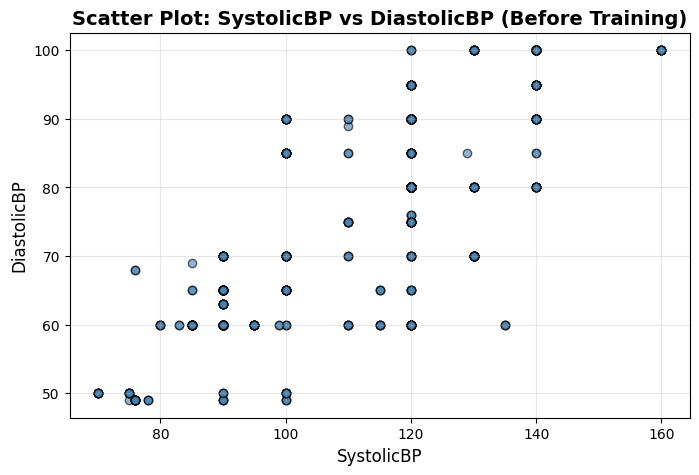

In [157]:
plt.figure(figsize=(8, 5))
plt.scatter(data["SystolicBP"], data["DiastolicBP"],
            alpha=0.6, color="steelblue", edgecolors="black")

plt.xlabel("SystolicBP", fontsize=12)
plt.ylabel("DiastolicBP", fontsize=12)
plt.title("Scatter Plot: SystolicBP vs DiastolicBP (Before Training)", fontsize=14, fontweight="bold")
plt.grid(True, alpha=0.3)
plt.savefig("scatter_systolic_diastolic.png", dpi=300, bbox_inches='tight')
plt.show()


In [135]:
X = data.drop(columns=['RiskLevel', 'SystolicBP'])
y = data['SystolicBP']

In [136]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [137]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [138]:
LR = LinearRegression()
LR.fit(X_train, y_train)

LinearRegression()

In [139]:
y_pred = LR.predict(X_test)

In [140]:
y_pred = LR.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Mean Squared Error: 122.26197413358187
Mean Absolute Error: 8.893168303584245
R-squared: 0.6221718011657565


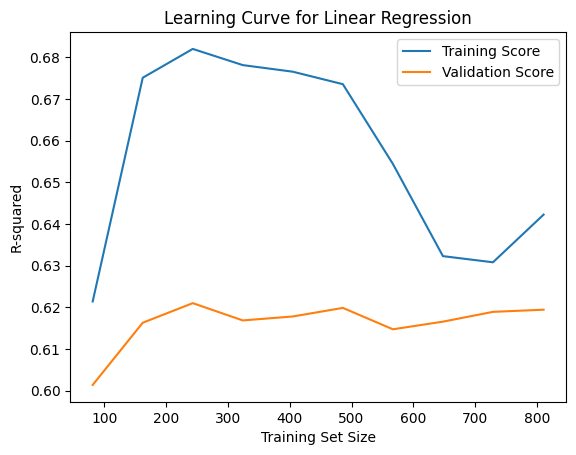

In [141]:
train_sizes, train_scores, test_scores = learning_curve(
    LinearRegression(), X, y, cv=5, scoring='r2', n_jobs=1,
    train_sizes=np.linspace(0.1, 1.0, 10)
)

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_mean, label='Training Score')
plt.plot(train_sizes, test_mean, label='Validation Score')
plt.xlabel('Training Set Size')
plt.ylabel('R-squared')
plt.title('Learning Curve for Linear Regression')
plt.legend()
plt.show()

In [142]:
train_scores

array([[0.71363287, 0.59833755, 0.59833755, 0.59833755, 0.59833755],
       [0.64435482, 0.68275812, 0.68275812, 0.68275812, 0.68275812],
       [0.64142877, 0.67948944, 0.69635093, 0.69635093, 0.69635093],
       [0.65779979, 0.6856915 , 0.68235412, 0.68235412, 0.68235412],
       [0.67724091, 0.69603454, 0.66978454, 0.66978454, 0.66978454],
       [0.66985027, 0.68785473, 0.66227797, 0.67384379, 0.67384379],
       [0.63321028, 0.65445913, 0.62581052, 0.6792499 , 0.6792499 ],
       [0.60351909, 0.62463439, 0.5970637 , 0.66579286, 0.67032938],
       [0.60639525, 0.62635452, 0.59997368, 0.6612821 , 0.65993869],
       [0.63004435, 0.64511545, 0.62438526, 0.6775474 , 0.6340701 ]])

In [143]:
RandomF = RandomForestRegressor()
RandomF.fit(X_train, y_train)
y_pred = RandomF.predict(X_test)

In [144]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Mean Squared Error: 15.761674574659322
Mean Absolute Error: 1.879430787466502
R-squared: 0.951291436627316


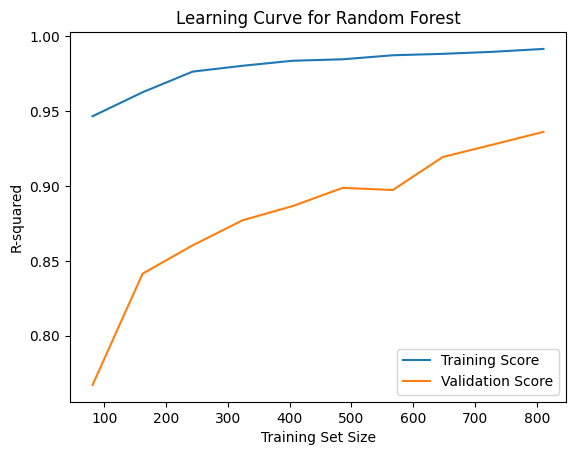

In [145]:
train_sizes, train_scores, test_scores = learning_curve(
    RandomForestRegressor(n_estimators=100), X, y, cv=5, scoring='r2', n_jobs=1,
    train_sizes=np.linspace(0.1, 1.0, 10)
)

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_mean, label='Training Score')
plt.plot(train_sizes, test_mean, label='Validation Score')
plt.xlabel('Training Set Size')
plt.ylabel('R-squared')
plt.title('Learning Curve for Random Forest')
plt.legend()
plt.show()

In [146]:
decision_tree = DecisionTreeRegressor()
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)

In [147]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Mean Squared Error: 18.011494252873565
Mean Absolute Error: 0.9704433497536946
R-squared: 0.9443387817013227


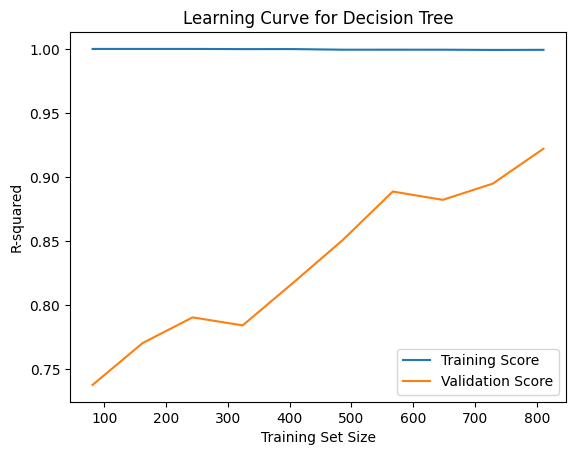

In [148]:
train_sizes, train_scores, test_scores = learning_curve(
    DecisionTreeRegressor(), X, y, cv=5, scoring='r2', n_jobs=1,
    train_sizes=np.linspace(0.1, 1.0, 10)
)

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_mean, label='Training Score')
plt.plot(train_sizes, test_mean, label='Validation Score')
plt.xlabel('Training Set Size')
plt.ylabel('R-squared')
plt.title('Learning Curve for Decision Tree')
plt.legend()
plt.show()

In [149]:
# Predictions
y_pred_lr = LR.predict(X_test)
y_pred_dt = decision_tree.predict(X_test)
y_pred_rf = RandomF.predict(X_test)

# Metrics for each model
metrics = {
    'Model': ['Linear Regression', 'Decision Tree', 'Random Forest'],
    'MSE': [
        mean_squared_error(y_test, y_pred_lr),
        mean_squared_error(y_test, y_pred_dt),
        mean_squared_error(y_test, y_pred_rf)
    ],
    'MAE': [
        mean_absolute_error(y_test, y_pred_lr),
        mean_absolute_error(y_test, y_pred_dt),
        mean_absolute_error(y_test, y_pred_rf)
    ],
    'R²': [
        r2_score(y_test, y_pred_lr),
        r2_score(y_test, y_pred_dt),
        r2_score(y_test, y_pred_rf)
    ]
}

comparison_metrics = pd.DataFrame(metrics)
print(comparison_metrics)


               Model         MSE       MAE        R²
0  Linear Regression  122.261974  8.893168  0.622172
1      Decision Tree   18.011494  0.970443  0.944339
2      Random Forest   15.761675  1.879431  0.951291


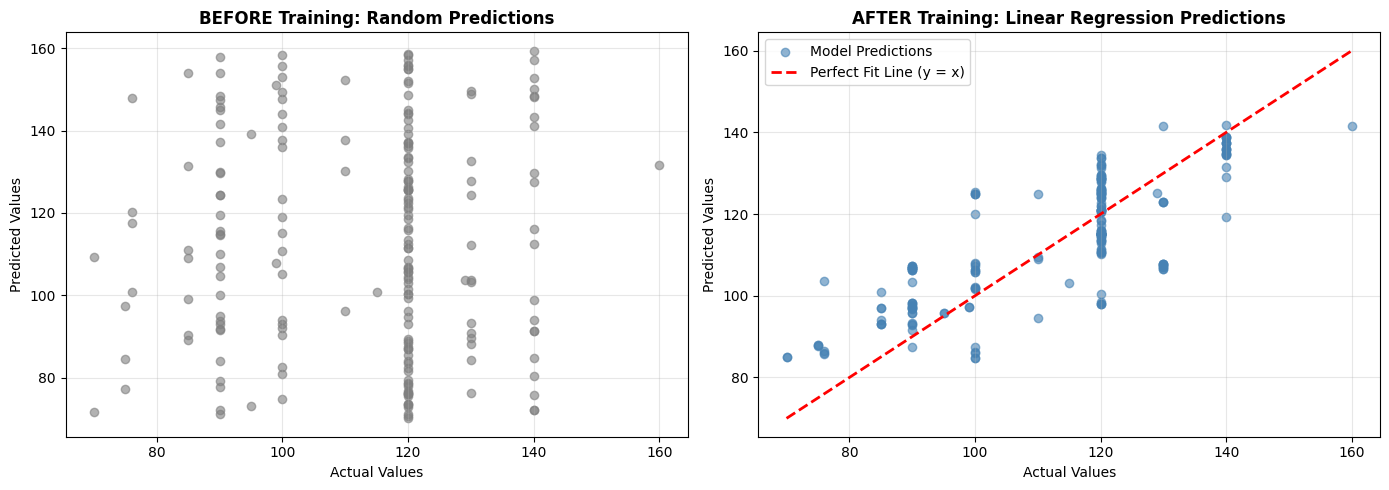

In [158]:
import numpy as np
import matplotlib.pyplot as plt

# Assume y_test and y_pred_lr already exist
# y_test = actual values
# y_pred_lr = linear regression predictions

# Create RANDOM predictions to simulate "before training"
random_predictions = np.random.uniform(y_test.min(), y_test.max(), len(y_test))

# Plot before/after
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# ----------------------------------------------------------
# BEFORE TRAINING — random predictions
# ----------------------------------------------------------
axes[0].scatter(y_test, random_predictions, alpha=0.6, color="gray")
axes[0].set_title("BEFORE Training: Random Predictions", fontsize=12, fontweight="bold")
axes[0].set_xlabel("Actual Values")
axes[0].set_ylabel("Predicted Values")
axes[0].grid(True, alpha=0.3)

# ----------------------------------------------------------
# AFTER TRAINING — linear regression predictions
# ----------------------------------------------------------
axes[1].scatter(y_test, y_pred_lr, alpha=0.6, color="steelblue", label="Model Predictions")

# Add the PERFECT FIT line (y = x)
min_val = min(y_test.min(), y_pred_lr.min())
max_val = max(y_test.max(), y_pred_lr.max())
axes[1].plot([min_val, max_val], [min_val, max_val], "r--", linewidth=2, label="Perfect Fit Line (y = x)")

axes[1].set_title("AFTER Training: Linear Regression Predictions", fontsize=12, fontweight="bold")
axes[1].set_xlabel("Actual Values")
axes[1].set_ylabel("Predicted Values")
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig("scatter_random_linear.png", dpi=300, bbox_inches='tight')
plt.show()


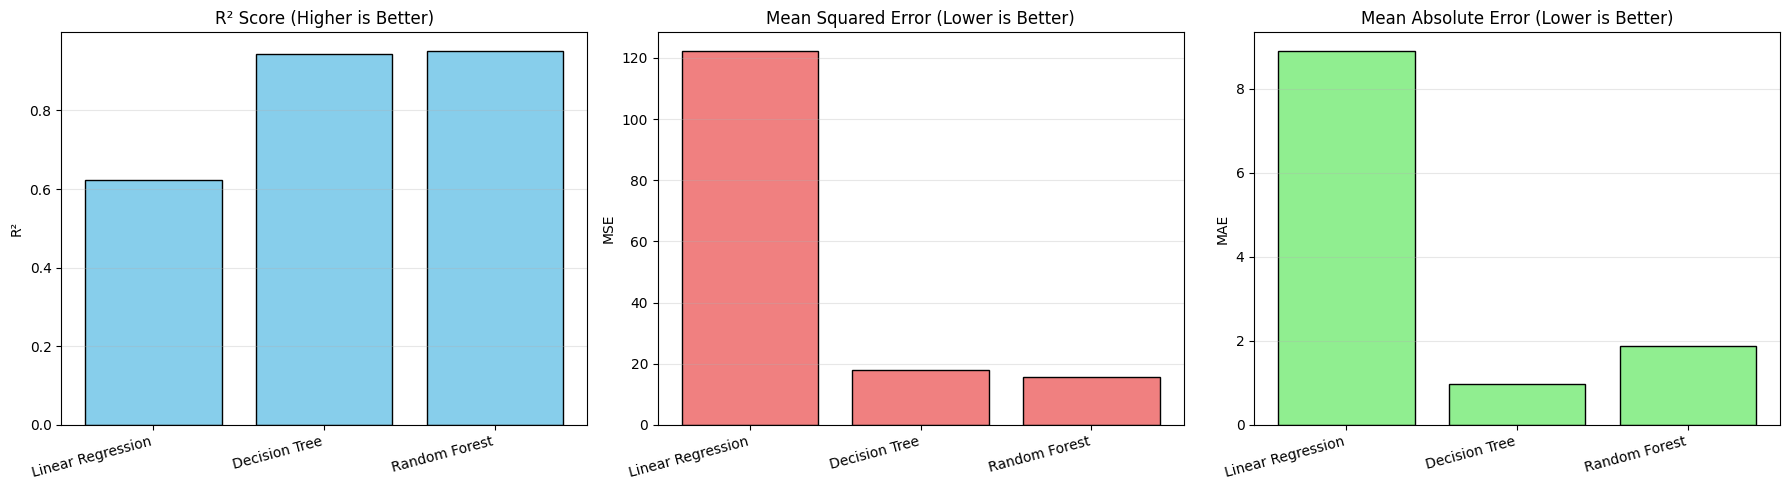

In [151]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
x_pos = np.arange(len(comparison_metrics))

# R² plot (Higher is better)
axes[0].bar(x_pos, comparison_metrics['R²'], color='skyblue', edgecolor='black')
axes[0].set_xticks(x_pos)
axes[0].set_xticklabels(comparison_metrics['Model'], rotation=15, ha='right')
axes[0].set_title('R² Score (Higher is Better)')
axes[0].set_ylabel('R²')
axes[0].grid(axis='y', alpha=0.3)

# MSE plot (Lower is better)
axes[1].bar(x_pos, comparison_metrics['MSE'], color='lightcoral', edgecolor='black')
axes[1].set_xticks(x_pos)
axes[1].set_xticklabels(comparison_metrics['Model'], rotation=15, ha='right')
axes[1].set_title('Mean Squared Error (Lower is Better)')
axes[1].set_ylabel('MSE')
axes[1].grid(axis='y', alpha=0.3)

# MAE plot (Lower is better)
axes[2].bar(x_pos, comparison_metrics['MAE'], color='lightgreen', edgecolor='black')
axes[2].set_xticks(x_pos)
axes[2].set_xticklabels(comparison_metrics['Model'], rotation=15, ha='right')
axes[2].set_title('Mean Absolute Error (Lower is Better)')
axes[2].set_ylabel('MAE')
axes[2].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()


In [152]:
pipeline = {
    'model': decision_tree,
    'scaler': scaler,
    'feature_columns': X.columns.tolist()
}

with open('model.pkl', 'wb') as file:
    pickle.dump(pipeline, file)

In [153]:
# loading the best model (decision tree)
with open("model.pkl", "rb") as file:
    best_loaded_model = pickle.load(file)


In [154]:
# Example: make predictions on X_test
input_data = {
    "Age": [120],
    "DiastolicBP": [40],
    "BS": [30],
    "BodyTemp": [95],
    "HeartRate": [30]
}

X_test_single = pd.DataFrame(input_data)
y_pred = best_loaded_model['model'].predict(X_test_single)
print(y_pred)


[160.]
